In [1]:
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import os 
import sklearn
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sys


import gzip
import os
import copy
import random


from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from matplotlib.pyplot import figure

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 


from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostRegressor

When Should We Use A/B Testing?
A/B testing works best when testing incremental changes, such as UX changes, new features, ranking, and page load times. Here you may compare pre and post-modification results to decide whether the changes are working as desired or not.

A/B testing doesn’t work well when testing major changes, like new products, new branding, or completely new user experiences. In these cases, there may be effects that drive higher than normal engagement or emotional responses that may cause users to behave in a different manner.



In [3]:
test= pd.read_csv("test_table.csv")
user=pd.read_csv("user_table.csv")

In [4]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [6]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [7]:
test.shape

(453321, 9)

In [8]:
user.shape

(452867, 4)

In [11]:
test['user_id'].nunique()==len(test['user_id'])

True

In [12]:
user['user_id'].nunique()==len(user['user_id'])

True

In [13]:
len(test['user_id'])-len(user['user_id'])

454

In [15]:
#number of user is different from both table 

# inner join the table 

data=test.merge(user, on=['user_id'])

In [16]:
data.shape

(452867, 12)

In [17]:
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19,Mexico


In [18]:
data["date"]=pd.to_datetime(data["date"])
print(data.describe(include="all"))

               user_id                 date  source  device browser_language  \
count    452867.000000               452867  452867  452867           452867   
unique             NaN                    5       3       2                3   
top                NaN  2015-12-04 00:00:00     Ads     Web               ES   
freq               NaN               141024  181693  251316           377160   
first              NaN  2015-11-30 00:00:00     NaN     NaN              NaN   
last               NaN  2015-12-04 00:00:00     NaN     NaN              NaN   
mean     499944.805166                  NaN     NaN     NaN              NaN   
std      288676.264784                  NaN     NaN     NaN              NaN   
min           1.000000                  NaN     NaN     NaN              NaN   
25%      249819.000000                  NaN     NaN     NaN              NaN   
50%      500019.000000                  NaN     NaN     NaN              NaN   
75%      749543.000000                  

In [20]:
#to check spain is actually beter than LatAm for converstion
country_converstion=data.loc[data.test==0].groupby('country')['conversion'].mean()

In [21]:
country_converstion.sort_values(ascending=False)

country
Spain          0.079719
El Salvador    0.053554
Nicaragua      0.052647
Costa Rica     0.052256
Colombia       0.052089
Honduras       0.050906
Guatemala      0.050643
Venezuela      0.050344
Peru           0.049914
Mexico         0.049495
Bolivia        0.049369
Ecuador        0.049154
Paraguay       0.048493
Chile          0.048107
Panama         0.046796
Argentina      0.015071
Uruguay        0.012048
Name: conversion, dtype: float64

## t test

In [22]:
#a simple t-test here should work. We have collected ~0.5MM data and test/control split is ~50/50.
from scipy import stats

In [23]:
#nothing changed in Spain, so no point in keeping those users

df=data.loc[data.country!='Spain']

In [27]:
df.country.unique()

array(['Mexico', 'Venezuela', 'Bolivia', 'Colombia', 'Uruguay',
       'El Salvador', 'Nicaragua', 'Peru', 'Costa Rica', 'Chile',
       'Argentina', 'Ecuador', 'Guatemala', 'Honduras', 'Paraguay',
       'Panama'], dtype=object)

In [35]:
#t-test of test vs control for our target metric 
ttest=stats.ttest_ind(df[df['test']==1]['conversion'], df[df['test']==0]['conversion'],
                     equal_var=False)

In [36]:
df.groupby('test')['conversion'].mean()

test
0    0.048292
1    0.043411
Name: conversion, dtype: float64

In [37]:
ttest.pvalue

##means no difference?b


1.9289178577799033e-13

In [38]:
ttest.statistic


-7.353895203080277

## control users are converting at 4.8% while users in the test just at 4.3%. That’s a 10% drop, which would be dramatic if it were true. The most likely reason for weird A/B test results are:


1) we didnt collect enough data
2) there are bias, test/control ppl are not really random

whenever result appear too bad or too good to be true, they are not true

In [34]:
import matplotlib.pyplot as plt


## compare test and control conversion rate by day and plot it


In [51]:
date_converstion=df.groupby(['date','test'])['conversion'].mean()
date_converstion

date        test
2015-11-30  0       0.051204
            1       0.043878
2015-12-01  0       0.046249
            1       0.041371
2015-12-02  0       0.048472
            1       0.044216
2015-12-03  0       0.049255
            1       0.043898
2015-12-04  0       0.047085
            1       0.043459
Name: conversion, dtype: float64

In [55]:
date_converstion

dtype('float64')

In [56]:
import seaborn as sns


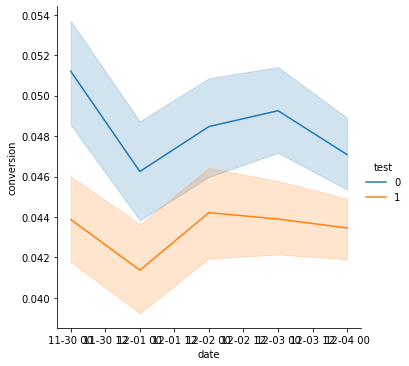

In [58]:
sns.relplot(data=df, kind="line", x="date", y="conversion", hue="test")

<AxesSubplot:xlabel='conversion', ylabel='Density'>

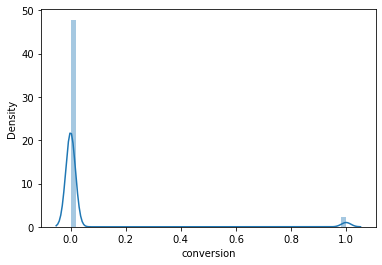

In [107]:
sns.distplot(df[df.test==1].conversion)

<AxesSubplot:xlabel='conversion', ylabel='Density'>

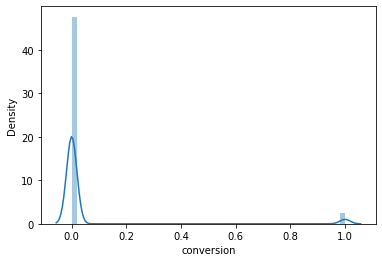

In [108]:
sns.distplot(df[df.test==0].conversion)

## 1)test is 1, which constantly lower conversion rate than control . and not much variance through out the date, so have enough data, but some bias in test.

## 2)can ran it for 5 days, 2 weeks for full weekly patterns


## Check A/B Test Randomization
Checking that randomization worked well simply means making sure that all variables have the same distribution in test and control. So, taking for instance the first variable, source, it would mean checking that proportion of users coming from ads, SEO, and direct is the same.


In [77]:
#let's group by source and estimate relative frequencies
group_source = df.groupby(['source','test'])['user_id'].count()

In [78]:
group_source

source  test
Ads     0       74352
        1       86448
Direct  0       37238
        1       43047
SEO     0       73721
        1       86279
Name: user_id, dtype: int64

In [80]:
group_source/df.groupby('test')['user_id'].count()

source  test
Ads     0       0.401228
        1       0.400641
Direct  0       0.200949
        1       0.199500
SEO     0       0.397823
        1       0.399858
Name: user_id, dtype: float64

In [70]:
data_grouped_source = df.groupby("source")["test"].agg(
frequency_test_0 = lambda x: len(x[x==0]), 
frequency_test_1 = lambda x: len(x[x==1])
)

In [71]:
data_grouped_source

,frequency_test_0,frequency_test_1
source,,
Ads,74352,86448
Direct,37238,43047
SEO,73721,86279


In [73]:
data_grouped_source.sum()

frequency_test_0    185311
frequency_test_1    215774
dtype: int64

In [72]:
print(data_grouped_source/data_grouped_source.sum())


        frequency_test_0  frequency_test_1
source                                    
Ads             0.401228          0.400641
Direct          0.200949          0.199500
SEO             0.397823          0.399858


## source are similar in both test and control  

check for randomization

In [81]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
  

In [82]:
df['date']=df['date'].apply(str)

In [83]:
data_dummy=pd.get_dummies(df)

In [84]:
data_dummy


,user_id,conversion,test,age,date_2015-11-30 00:00:00,date_2015-12-01 00:00:00,date_2015-12-02 00:00:00,date_2015-12-03 00:00:00,date_2015-12-04 00:00:00,source_Ads,...,country_El Salvador,country_Guatemala,country_Honduras,country_Mexico,country_Nicaragua,country_Panama,country_Paraguay,country_Peru,country_Uruguay,country_Venezuela
1,497851,0,1,21,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
3,290051,0,1,22,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4,548435,0,1,19,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5,540675,0,1,22,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,863394,0,0,35,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452861,783089,0,0,20,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
452862,425010,0,0,50,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
452863,826793,0,1,20,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452865,785224,0,1,21,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
x=data_dummy.drop(['test','conversion'],axis=1)

In [88]:
#change weights. Our data set is now perfectly balanced. It makes easier to understand the tree output
#only split if if it's worthwhile. 
#The default value of 0 means always split no matter 
#what if you can increase overall performance, which creates tons of noisy and irrelevant splits
#which creates tons of noisy and irrelevant splits
tree=DecisionTreeClassifier(class_weight='balanced',min_impurity_decrease=0.001)

In [89]:
tree.fit(x,data_dummy['test'])

DecisionTreeClassifier(class_weight='balanced', min_impurity_decrease=0.001)

In [91]:
export_graphviz(tree, out_file="tree_test.dot", feature_names=x.columns, proportion=True, rotate=True)
s = Source.from_file("tree_test.dot")
s.view()

'tree_test.dot.pdf'

Our tree was right! In test, 17% of users are from Argentina, but in control only 5% of users are from Argentina. Uruguay is even more extreme: test has 1.7% of users from Uruguay and control has just 0.2% of Uruguayan users.

???? how to read the output of tree?


In [92]:
data_dummy.groupby('test')['country_Argentina','country_Uruguay'].mean()

,country_Argentina,country_Uruguay
test,,
0,0.050488,0.002239
1,0.173223,0.017236


 these two country has big difference in test group and control group
 And this is a big problem because that means we are not comparing anymore apples to 
 apples in our A/B test. 
 The difference we might see in conversion rate might very well depend on the fact that users between the two groups are different.




In [99]:
## run new t statistic by removing the two country 

In [96]:
ttest_update=stats.ttest_ind(data_dummy[(df['test']==1)& (data_dummy['country_Argentina']==0) & (data_dummy['country_Uruguay']==0) ]['conversion'], df[(df['test']==0) & (data_dummy['country_Argentina']==0) & (data_dummy['country_Uruguay']==0)]['conversion'],
                     equal_var=False)

In [97]:
ttest_update.pvalue

0.7200849282884506

In [98]:
ttest_update.statistic

0.3583455794481446

In [ ]:
 ##review the code and check ab testing example online

In [104]:
data_test_country = df.groupby('country')['conversion'].agg(
                   p_value = lambda x: stats.ttest_ind(x[df["test"]==1], 
                                                        x[df["test"]==0], 
                                                        equal_var=False
                                                        ).pvalue,
                   conversion_test= lambda x: x[df["test"]==1].mean(),
                   conversion_control=lambda x: x[df["test"]==0].mean()
                   ).reindex(['p_value','conversion_test','conversion_control'], 
                                   axis=1
                                 )
                     

In [105]:
data_test_country

,p_value,conversion_test,conversion_control
country,,,
Argentina,0.335147,0.013725,0.015071
Bolivia,0.718885,0.047901,0.049369
Chile,0.302848,0.051295,0.048107
Colombia,0.423719,0.050571,0.052089
Costa Rica,0.687876,0.054738,0.052256
Ecuador,0.961512,0.048988,0.049154
El Salvador,0.248127,0.047947,0.053554
Guatemala,0.572107,0.048647,0.050643
Honduras,0.471463,0.047540,0.050906


## build linear model, what coef for test vs control, is it truly negative . y is conversion rate, see if any of them are covarance, then you want to control them.




# no difference is the null hypotheiss, so if p<0.05 then reject the null hyposhteis 


# t test on each country, every conunty has p value, if each country has 

# the only thing changes is translation
so if any other variable changes, so there are other variabsles that are not controled for, maybe bias 
if you want blanced test and control, can do random sample as well,instead of throw country out 
can also look at other variables seperately
and have to look at country seperately, coz each country has differnet translation